# Quantum Optics with Qutip:
## Chapter 6: Atom-field interaction - quantum theory

Author's infomation: 

* Siwei Wang @ IAMS-Sinica, Taipei
* Email: wswrpd@gmail.com

### J-C Hamailtonian
In this notebook, we study the Hamiltonian describing the interaction of a single two-level atom with a single-mode field:
\begin{align}
    \hat{H}_\mathrm{JC} = \hbar\omega_c \hat{a}^\dagger\hat{a} + \frac{\hbar\omega_a}{2}\hat{\sigma}_\mathrm{z} + \hbar g \left(\hat{\sigma}_+\hat{a} + \hat{\sigma}_-\hat{a}^\dagger \right)
\end{align}
where $\hat{a}^\dagger$ and $\hat{a}$ are the bosonic creation and annihilation operator, respectively.  $\hat{\sigma}_+$ and $\hat{\sigma}_-$ are ladder operators in the $\hat{\sigma}_\mathrm{z}$ representation, and $\hat{\sigma}_+=|\mathrm{e}\rangle\langle \mathrm{g}|$, $\hat{\sigma}_-=|\mathrm{g}\rangle\langle \mathrm{e}|$.

#### Fig. 6.2
The wavefunction can be expressed in the local basis:
\begin{align}
    |\psi(t)\rangle = \sum_n \left[ c_{\mathrm{e},n}(t) |\mathrm{e},n\rangle + c_{\mathrm{g},n}(t) |\mathrm{g},n\rangle   \right]
\end{align}
where $|\mathrm{e},n\rangle$ is the state in which the atom is in the excited state and the field has $n$ photons. $|\mathrm{g},n\rangle$ is the state in which the atom is in the ground state and the field has $n$ photons.

Fig. 6.2 describes the time evolution of the population inversion $W(t)$ for an initially coherent state with $\langle n\rangle= 25$ and $\omega_c=\omega_a$, which means the initially coherent state is,
\begin{align}
  |\psi(0)\rangle = \sum_n \left[ \sqrt{\frac{\langle n\rangle^n e^{-\langle n\rangle}}{n!}} |\mathrm{e},n\rangle  \right]
\end{align}

The observable $W(t)$ is the population inversion of the atom which is related to the probability amplitudes $c_{\mathrm{e},n}$ and $c_{\mathrm{g},n}$ by the expression
\begin{align}
    W(t) &= \langle \psi(t)| \hat{\sigma}_z |\psi(t)\rangle \\
         &=\sum_n \left[ |c_{\mathrm{e},n}(t)|^2- |c_{\mathrm{g},n}(t)|^2  \right]
\end{align}

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
#import neccessary packages

Text(0.5, 1.0, 'Population Inversion')

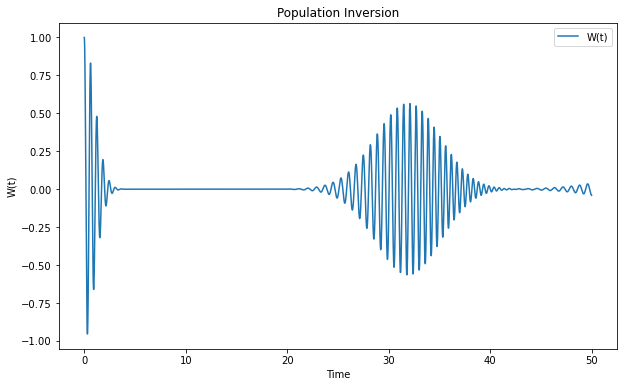

In [2]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.01 * 2 * np.pi
N = 100
step = 5001

a = tensor(destroy(N),qeye(2))
Sigz = tensor(qeye(N),sigmaz())
Sigp = tensor(qeye(N),destroy(2))
Sigm = tensor(qeye(N),create(2))

H = wc * a.dag() * a + 0.5* wa * Sigz + g * (a.dag() * Sigm + a * Sigp)

t_list = np.linspace(0,50.0/(g),step)    # the initial state is a coherent state.

psi0 = tensor(coherent(N,np.sqrt(25)),basis(2,0))

result0 = mesolve(H,psi0,t_list,[],[Sigz])

n_c_0 = result0.expect[0]

fig,axes = plt.subplots(1,1,figsize = (10,6))
axes.plot(t_list*g,n_c_0,label = 'W(t)')

axes.legend(loc = 'best')
axes.set_xlabel('Time')
axes.set_ylabel('W(t)')
axes.set_title('Population Inversion')

Text(0.5, 1.0, 'Population Inversion')

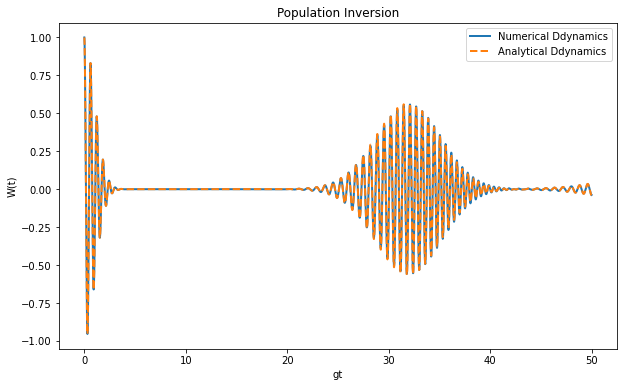

In [3]:
rho = np.zeros(N)
rho[0] = np.exp(-25)
for i in range(1,N):
    rho[i] = rho[i-1]*25/i

Omega = 2*np.sqrt(np.arange(N)+1)
Wt = np.zeros(step)
temp = 0
for Tt in t_list:
    Wt[temp]=np.sum(rho*np.cos(Omega*g*Tt))
    temp = temp + 1
    
fig,axes = plt.subplots(figsize=(10,6))    
axes.plot(t_list*g,Wt,'-',linewidth=2,label='Numerical Ddynamics')
axes.plot(t_list*g,n_c_0,'--',linewidth=2,label='Analytical Ddynamics')
axes.legend(loc = 'best')
axes.set_xlabel('gt')
axes.set_ylabel('W(t)')
axes.set_title('Population Inversion')
# Analytical formula in Eq. (6.2.21)

### Fig. 6.1
Fig. 6.1 shows the photon number distribution $p(n)$ for an initially coherent state (the value of the parameters are $\omega_c=\omega_a$, $\langle n\rangle = 25$, and $gt=1$),
\begin{align}
    p(n) = |c_{\mathrm{e},n}(t)|^2 + |c_{\mathrm{g},n}(t)|^2 
\end{align}

In [4]:
Time_end = 1.0
tlist2 = np.linspace(0,Time_end/(g),step)
result1 = mesolve(H,psi0,tlist2,[],[])
psi_end = result1.states[-1]
# Calculate the quantum dynamics and obtain the wavefunction "psi_end"

Text(0.5, 1.0, 'Photon number distribution')

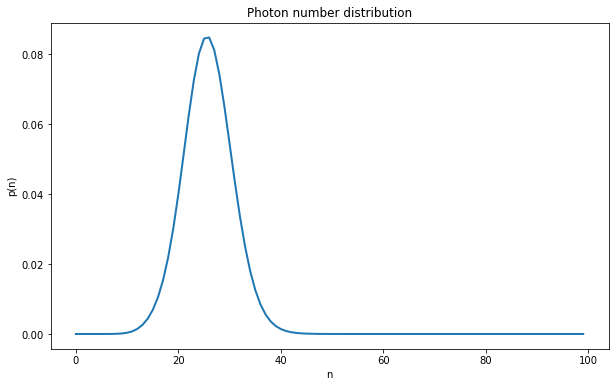

In [5]:
Wt = np.zeros((N,1),dtype=np.complex128)
temp = 0
for i in range(0,2*N,2):
    Wt[temp]=(psi_end[i]*np.conjugate(psi_end[i])+psi_end[i+1]*np.conjugate(psi_end[i+1]))
    temp = temp + 1

fig,axes = plt.subplots(figsize=(10,6))    
axes.plot(Wt.real,'-',linewidth=2)
axes.set_xlabel('n')
axes.set_ylabel('p(n)')
axes.set_title('Photon number distribution')
# Plot the W(t) at gt=1

Text(0.5, 1.0, 'Photon number distribution')

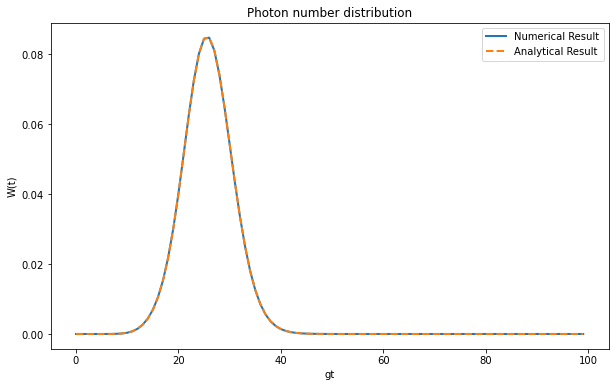

In [7]:
Wt_ana = np.zeros(N,dtype=np.complex128)
Wt_ana[0] = rho[0]*np.cos(Omega[0]*Time_end/2)**2
for i in range(1,N):
    Wt_ana[i]=rho[i]*np.cos(Omega[i]*Time_end/2)**2 + rho[i-1]*np.sin(Omega[i-1]*Time_end/2)**2

fig,axes = plt.subplots(figsize=(10,6))        
axes.plot(Wt.real,'-',linewidth=2,label='Numerical Result')
axes.plot(Wt_ana.real,'--',linewidth=2,label='Analytical Result')
axes.legend(loc = 'best')
axes.set_xlabel('n')
axes.set_ylabel('p(n)')
axes.set_title('Photon number distribution')    
# Plot the W(t) at gt=1 (analytical formula)

## References:
1. Scully, Marlan O., and M. Suhail Zubairy. "Quantum optics." (1999).
2. J. R. Johansson, P.D. Nation, and F. Nori, “QuTiP 2: A Python framework for the dynamics of open quantum systems”, Comp. Phys. Comm. 184, 1234 (2013).